## Open csv files

In [47]:
# with open("/Users/Beektees/Desktop/ml-latest-small/links.csv", "r") as f:
    # for line in f.read().split("\n"):
        # print(line)

## Read the whole file into a dictionary

In [48]:
import numpy as np
# Create a variable

moviedata = {}
number_of_ratings = 0
with open("/Users/Beektees/Desktop/ml-latest-small/links.csv", "r") as f:
    # Get rid of header. Read each line
    for line in f.read().split("\n")[1:]:
        if len(line) == 0:
            continue
        movieId, imdbId, tmdbId = line.split(",") 
        moviedata[movieId] = {"movieId": movieId, "imdbId": imdbId, "tmdbId": tmdbId}
        
with open("/Users/Beektees/Desktop/ml-latest-small/movies.csv", "r") as f:
    # Get rid of header. Read each line
    for line in f.read().split("\n")[1:]:
        # If the line is empty and has no data, then skip it
        if len(line) == 0:
            continue
      
        # Get the Movie ID from the first value split by comma
        movieId = line.split(",")[0]
        
        # Get the Genre from the last value split by command
        genres = line.split(",")[-1]
        
        # Get the Title from the 2nd value onward (includes the Genre), this creates a list
        # ['a', 'b', 'c']
        title = line.split(",")[1:]
        
        # Join the list by command
        # 'a,b,c'
        title = ",".join(title)
        
        # Remove the Genre from the title
        title = title.replace(","+genres, "")     
        
        # Remove the double quotes
        title = title.strip('"')
        
        # Get the Date from end of the title, remove the parenthesis
        year = title.split("(")[-1].replace(")", "") 
        
        # Remove the Date from the title
        title = title.replace(" ("+year+")", "")
        
        # Add Title, Date, Genre to the dictionary
        moviedata[movieId]["title"] = title
        moviedata[movieId]["year"] = year        
        moviedata[movieId]["genres"] = genres    
        moviedata[movieId]["tags"] = []   
        moviedata[movieId]["rating"] = [] 

with open("/Users/Beektees/Desktop/ml-latest-small/ratings.csv", "r") as f:
    # Get rid of header. Read each line
    for line in f.read().split("\n")[1:]:        
        # If the line is empty and has no data, then skip it
        if len(line) == 0:
            continue
            
        # Split by comma            
        userId, movieId, rating, timestamp = line.split(",")
        
        # Add the Rating to the dictionary
        moviedata[movieId]["rating"].append(rating)
        number_of_ratings = number_of_ratings + 1

with open("/Users/Beektees/Desktop/ml-latest-small/tags.csv", "r") as f:
    # Get rid of header. Read each line
    for line in f.read().split("\n")[1:]:        
        # If the line is empty and has no data, then skip it
        if len(line) == 0:
            continue
            
        # Split by comma
        userId, movieId, tag, timestamp = line.split(",")
        
        # Add the Tag to the list
        moviedata[movieId]["tags"].append(tag.lower())
        
        # Ensure the tags are unique
        moviedata[movieId]["tags"] = list(set(moviedata[movieId]["tags"]))

# Change list back to single string seperated by pipe
for k, v in moviedata.items():
    moviedata[k]["tags"] = "|".join(moviedata[k]["tags"])
    
    if len(moviedata[k]["rating"]):
        # Calculate the average rating
        moviedata[k]["avg_rating"] = np.mean(list(map(lambda x: float(x), moviedata[k]["rating"])))    
        
        # Set well reviewed to true if > 4.0
        moviedata[k]["well_reviewed"] = 1 if moviedata[k]["avg_rating"] > 4.0 else 0
    else:
        moviedata[k]["well_reviewed"] = 0 
        moviedata[k]["avg_rating"] = 0
    
    moviedata[k]["rating"] = "|".join(moviedata[k]["rating"])


# Create the list of columns        
cols = ['movieId', 'title', 'year', 'genres', 'rating', 'tags']        

with open("/Users/Beektees/Desktop/ml-latest-small/combined.csv", "w") as f:
    # Write the Header  
    f.write(",".join(cols)+"\n")
    
    # Iterate (loop) over the items in the dictionary, use the key and valu
    for k, v in moviedata.items():
        line = []
        for c in cols:
            # Add a blank value
            if c not in v:
                line.append("")
            # Add the value to the list, ensure we put quotes around it
            else:
                line.append('"{}"'.format(v[c]))
        f.write(",".join(line)+"\n")       
       
print(moviedata[list(moviedata)[0]])

{'movieId': '1', 'imdbId': '0114709', 'tmdbId': '862', 'title': 'Toy Story', 'year': '1995', 'genres': 'Adventure|Animation|Children|Comedy|Fantasy', 'tags': 'fun|pixar', 'rating': '4.0|4.0|4.5|2.5|4.5|3.5|4.0|3.5|3.0|5.0|3.0|3.0|5.0|5.0|3.0|4.0|5.0|3.0|3.0|5.0|5.0|4.0|4.0|2.5|5.0|4.5|0.5|4.0|2.5|4.0|3.0|3.0|4.0|3.0|5.0|4.5|4.0|4.0|3.0|3.5|4.0|4.0|3.0|2.0|3.0|4.0|4.0|3.0|4.0|3.5|5.0|5.0|2.0|3.0|4.0|4.5|4.0|4.0|5.0|3.5|4.5|5.0|5.0|4.0|4.0|4.0|4.0|4.0|4.0|2.0|3.5|5.0|4.0|5.0|3.5|3.0|3.0|4.0|3.5|5.0|3.5|3.5|5.0|3.5|3.0|5.0|4.0|5.0|5.0|4.0|4.5|4.5|4.0|4.0|2.0|5.0|5.0|5.0|4.0|5.0|4.0|4.0|3.0|4.5|4.5|3.0|4.5|4.0|4.0|4.0|3.0|2.0|5.0|4.0|3.0|3.5|3.5|5.0|4.0|4.0|3.5|4.0|4.0|4.0|5.0|5.0|4.0|5.0|5.0|4.0|5.0|5.0|3.0|3.0|4.5|5.0|3.5|4.5|4.0|5.0|3.0|5.0|4.0|3.5|5.0|2.0|4.0|4.0|4.0|2.5|4.0|4.0|4.5|4.0|5.0|5.0|5.0|5.0|4.5|1.5|4.0|4.0|4.0|5.0|4.0|4.0|4.0|3.0|4.0|4.5|4.5|3.5|4.0|4.0|4.0|4.0|4.0|4.0|3.0|4.0|4.0|2.5|3.0|5.0|4.0|3.0|3.0|4.0|4.0|5.0|3.0|4.0|4.5|3.5|4.0|4.0|5.0|4.0|3.0|5.0|5.0|4.0|4.0|4.0|3.

In [49]:
import re
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
    
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

bad_reviews = []
good_reviews = []
stemmer = WordNetLemmatizer()

for k, v in moviedata.items():
    
    # Iterate each tag independently
    for t in v["tags"].split("|"):
        # Remove all the special characters
        rev = re.sub(r'\W', ' ', str(t))

        # remove all single characters
        rev = re.sub(r'\s+[a-zA-Z]\s+', ' ', rev)

        # Remove single characters from the start
        rev = re.sub(r'\^[a-zA-Z]\s+', ' ', rev) 

        # Substituting multiple spaces with single space
        rev = re.sub(r'\s+', ' ', rev, flags=re.I)

        # Removing prefixed 'b'
        rev = re.sub(r'^b\s+', '', rev)

        # Converting to Lowercase
        rev = rev.lower()

        # Lemmatization  (make cats, cat the same)
        rev = rev.split()
        rev = [stemmer.lemmatize(word) for word in rev]
        rev = ' '.join(rev)

        # Add to list of tags
        if v["well_reviewed"] == 1:
            good_reviews.append(rev)
        else:
            bad_reviews.append(rev)            

# Filter empty tags        
good_reviews = list(filter(lambda x: len(x) > 0, good_reviews))
bad_reviews = list(filter(lambda x: len(x) > 0, bad_reviews))

## Frequently occurring movie Tags of good movies

[('in netflix queue', 33), ('atmospheric', 17), ('thought provoking', 10), ('suspense', 9), ('quirky', 9)]


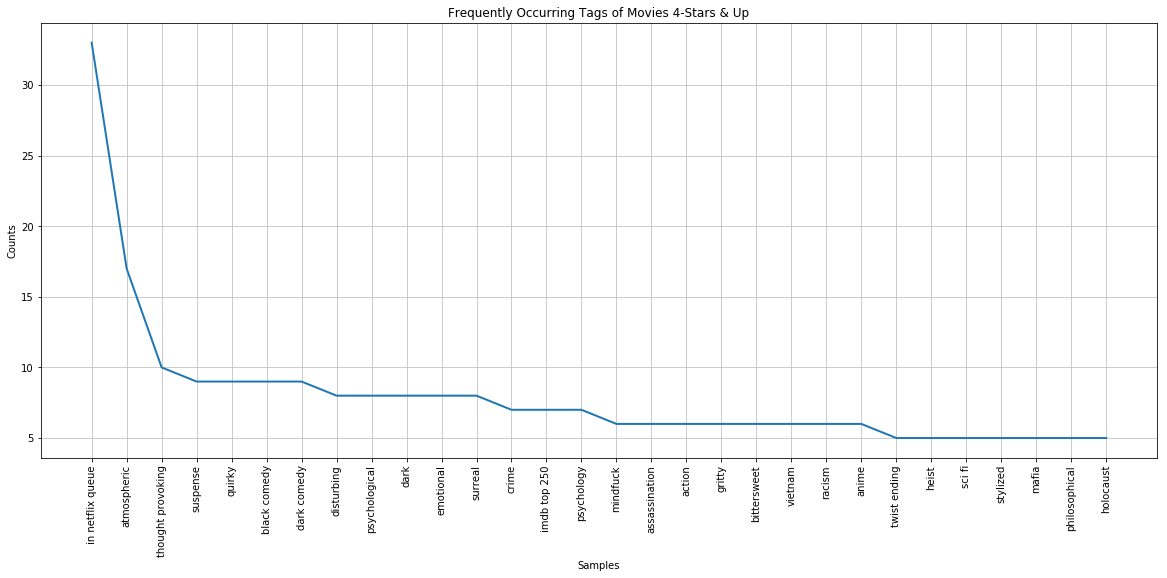

In [50]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Print the top 5 most common tags
# 1) in netflix queue 33 times  2) atmospheric 17 times  3) thought provoking 10 times
# 4) suspense 9 times  5) quirky 9 times

fdist = FreqDist(good_reviews)
# Default size of graph is 6.4" x 4.8"
plt.figure(figsize=(20,8))

print(fdist.most_common(5))

fdist.plot(30,cumulative=False, title="Frequently Occurring Tags of Movies 4-Stars & Up")

plt.show()

## Frequently occurring movie tags of bad movies

[('in netflix queue', 98), ('disney', 22), ('superhero', 21), ('atmospheric', 20), ('funny', 19)]


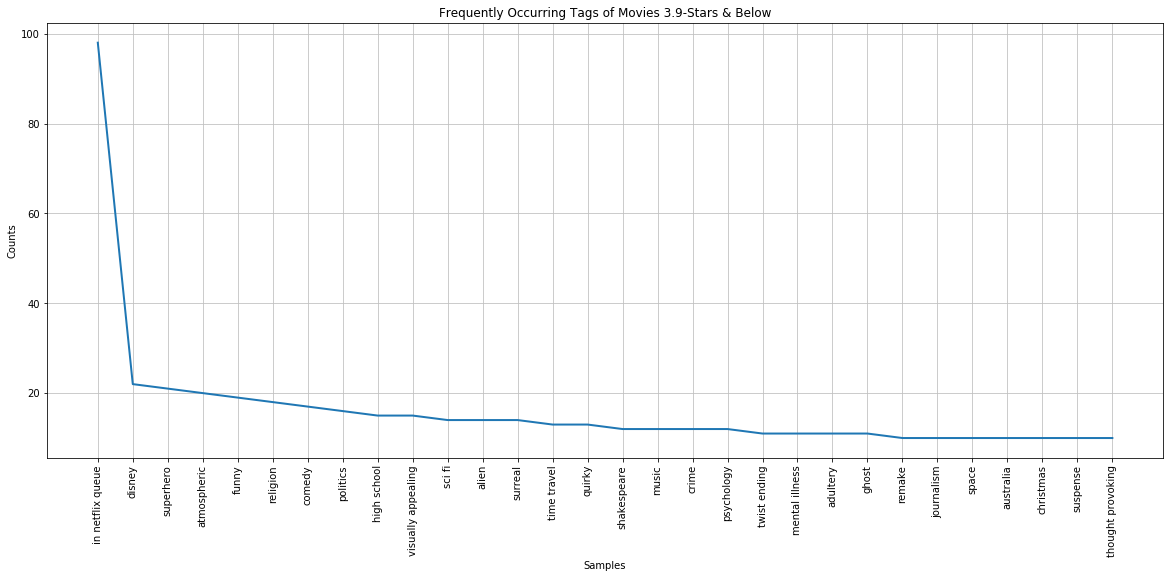

In [51]:
fdist = FreqDist(bad_reviews)

# Default size of graph is 6.4" x 4.8"
plt.figure(figsize=(20,8))

# Print the top 5 most common tags
print(fdist.most_common(5))

fdist.plot(30,cumulative=False, title="Frequently Occurring Tags of Movies 3.9-Stars & Below")
plt.show()

## Text Representation (pre-processing) and Random Forest Classifier algorithm on Genres

In [71]:
import re
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')

import sys
# !conda install -c conda-forge imbalanced-learn
# These 2 lines are needed to install the additional Python libraries
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import re
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

reviews = []
stemmer = WordNetLemmatizer()


for k, v in moviedata.items():

    # Remove all the special characters
    rev = re.sub(r'\W', ' ', str(v["genres"]))

    # remove all single characters
    rev = re.sub(r'\s+[a-zA-Z]\s+', ' ', rev)

    # Remove single characters from the start
    rev = re.sub(r'\^[a-zA-Z]\s+', ' ', rev) 

    # Substituting multiple spaces with single space
    rev = re.sub(r'\s+', ' ', rev, flags=re.I)

    # Converting to Lowercase
    rev = rev.lower()

    # Lemmatization  (make cats, cat the same)
    rev = rev.split()
    rev = [stemmer.lemmatize(word) for word in rev]
    rev = ' '.join(rev)

    # Add to list of tags
    reviews.append(rev)

# Create Y
y = []
for k, v in moviedata.items():
    y.append(v["well_reviewed"])

# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the algorithm
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)


# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print(accuracy_score(y_test, y_pred))

[[1686   18]
 [ 239    6]]
               precision    recall  f1-score   support

Movies <= 4.0       0.88      0.99      0.93      1704
 Movies > 4.0       0.25      0.02      0.04       245

    micro avg       0.87      0.87      0.87      1949
    macro avg       0.56      0.51      0.49      1949
 weighted avg       0.80      0.87      0.82      1949

0.8681375064135454


## Balanced Random Forest Classifier on Genres

In [72]:
# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the algorithm, from https://imbalanced-learn.org/
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = brf.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print(balanced_accuracy_score(y_test, y_pred))

[[1046  658]
 [ 107  138]]
               precision    recall  f1-score   support

Movies <= 4.0       0.91      0.61      0.73      1704
 Movies > 4.0       0.17      0.56      0.27       245

    micro avg       0.61      0.61      0.61      1949
    macro avg       0.54      0.59      0.50      1949
 weighted avg       0.81      0.61      0.67      1949

0.5885575356903325


## Multinomial Naive Bayes on Genres

In [97]:
# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Generation Using Multinomial Naive Bayes
classifier = MultinomialNB().fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[1704    0]
 [ 245    0]]
               precision    recall  f1-score   support

Movies <= 4.0       0.87      1.00      0.93      1704
 Movies > 4.0       0.00      0.00      0.00       245

    micro avg       0.87      0.87      0.87      1949
    macro avg       0.44      0.50      0.47      1949
 weighted avg       0.76      0.87      0.82      1949

MultinomialNB Accuracy: 0.8742945100051308


/Users/Beektees/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Balanced Multinomial Naive Bayes on Genres

In [98]:
from imblearn.over_sampling import RandomOverSampler

# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()

# Over Sample
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Model Generation Using Multinomial Naive Bayes
classifier = MultinomialNB().fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred))


[[1102  562]
 [ 781  948]]
               precision    recall  f1-score   support

Movies <= 4.0       0.59      0.66      0.62      1664
 Movies > 4.0       0.63      0.55      0.59      1729

    micro avg       0.60      0.60      0.60      3393
    macro avg       0.61      0.61      0.60      3393
 weighted avg       0.61      0.60      0.60      3393

MultinomialNB Accuracy: 0.6041850869437076


## Text Representation (pre-processing)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import re
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
    
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

reviews = []
stemmer = WordNetLemmatizer()

for k, v in moviedata.items():

    # Remove all the special characters
    rev = re.sub(r'\W', ' ', str(v["tags"]))

    # remove all single characters
    rev = re.sub(r'\s+[a-zA-Z]\s+', ' ', rev)

    # Remove single characters from the start
    rev = re.sub(r'\^[a-zA-Z]\s+', ' ', rev) 

    # Substituting multiple spaces with single space
    rev = re.sub(r'\s+', ' ', rev, flags=re.I)

    # Converting to Lowercase
    rev = rev.lower()

    # Lemmatization  (make cats, cat the same)
    rev = rev.split()
    rev = [stemmer.lemmatize(word) for word in rev]
    rev = ' '.join(rev)

    # Add to list of tags
    reviews.append(rev)

# Create Y
y = []
for k, v in moviedata.items():
    y.append(v["well_reviewed"])

## Random Forest Classifier on Tags

In [58]:
# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the algorithm
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print(accuracy_score(y_test, y_pred))

[[1691   13]
 [ 237    8]]
               precision    recall  f1-score   support

Movies <= 4.0       0.88      0.99      0.93      1704
 Movies > 4.0       0.38      0.03      0.06       245

    micro avg       0.87      0.87      0.87      1949
    macro avg       0.63      0.51      0.50      1949
 weighted avg       0.81      0.87      0.82      1949

0.8717290918419702


## Balanced Random Forest Classifier on Tags

In [59]:
# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the algorithm, from https://imbalanced-learn.org/
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = brf.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print(balanced_accuracy_score(y_test, y_pred))

[[1621   83]
 [ 216   29]]
               precision    recall  f1-score   support

Movies <= 4.0       0.88      0.95      0.92      1704
 Movies > 4.0       0.26      0.12      0.16       245

    micro avg       0.85      0.85      0.85      1949
    macro avg       0.57      0.53      0.54      1949
 weighted avg       0.80      0.85      0.82      1949

0.534829213375491


## Multinomial Naive Bayes algorithm on Tags

In [100]:
# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Generation Using Multinomial Naive Bayes
classifier = MultinomialNB().fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[1704    0]
 [ 245    0]]
               precision    recall  f1-score   support

Movies <= 4.0       0.87      1.00      0.93      1704
 Movies > 4.0       0.00      0.00      0.00       245

    micro avg       0.87      0.87      0.87      1949
    macro avg       0.44      0.50      0.47      1949
 weighted avg       0.76      0.87      0.82      1949

MultinomialNB Accuracy: 0.8742945100051308


/Users/Beektees/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Balanced Multinomial Naive Bayes on Tags

In [101]:
from imblearn.over_sampling import RandomOverSampler

# Vectorize for TF-IDF (Term Frequency * Inverse Document Frequency)
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(reviews).toarray()

# Over Sample
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Model Generation Using Multinomial Naive Bayes
classifier = MultinomialNB().fit(X_train, y_train)

# Predict the sentiment for the reviews
y_pred = classifier.predict(X_test)

# Print evaluations
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=["Movies <= 4.0", "Movies > 4.0"]))
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[1102  562]
 [ 781  948]]
               precision    recall  f1-score   support

Movies <= 4.0       0.59      0.66      0.62      1664
 Movies > 4.0       0.63      0.55      0.59      1729

    micro avg       0.60      0.60      0.60      3393
    macro avg       0.61      0.61      0.60      3393
 weighted avg       0.61      0.60      0.60      3393

MultinomialNB Accuracy: 0.6041850869437076


In [ ]:
# Unfortunately this is the same output as Balanced Multinomial NB algorithm based on Genres
# so I do not thing this is correct. Cannot seem to change. Will not mention or use in the paper.

## Genres of 4 star & up movies

In [61]:
import re
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
    
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

bad_reviews = []
good_reviews = []
stemmer = WordNetLemmatizer()


for k, v in moviedata.items():
    
    # Iterate each tag independently
    for t in v["genres"].split("|"):
        # Remove all the special characters
        rev = re.sub(r'\W', ' ', str(t))

        # remove all single characters
        rev = re.sub(r'\s+[a-zA-Z]\s+', ' ', rev)

        # Remove single characters from the start
        rev = re.sub(r'\^[a-zA-Z]\s+', ' ', rev) 

        # Substituting multiple spaces with single space
        rev = re.sub(r'\s+', ' ', rev, flags=re.I)

        # Removing prefixed 'b'
        rev = re.sub(r'^b\s+', '', rev)

        # Converting to Lowercase
        rev = rev.lower()

        # Lemmatization  (make cats, cat the same)
        rev = rev.split()
        rev = [stemmer.lemmatize(word) for word in rev]
        rev = ' '.join(rev)

        # Add to list of tags
        if v["well_reviewed"] == 1:
            good_reviews.append(rev)
        else:
            bad_reviews.append(rev)            

# Filter empty tags        
good_reviews = list(filter(lambda x: len(x) > 0, good_reviews))
bad_reviews = list(filter(lambda x: len(x) > 0, bad_reviews))

[('drama', 646), ('comedy', 446), ('romance', 205), ('thriller', 165), ('crime', 158), ('action', 146), ('adventure', 124), ('animation', 124), ('documentary', 115), ('fantasy', 91)]


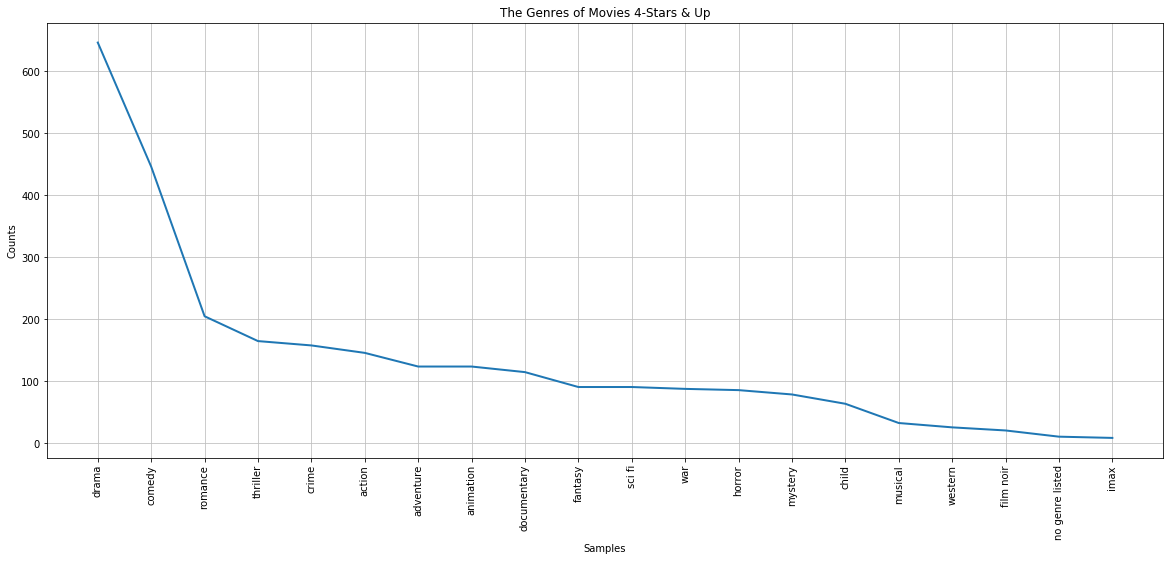

In [62]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(good_reviews)

# Default size of graph is 6.4" x 4.8"
plt.figure(figsize=(20,8))

# Print the genres of 4-star movies
print(fdist.most_common(10))

fdist.plot(30,cumulative=False, title="The Genres of Movies 4-Stars & Up")

plt.show()

## Genres of 3.9 star & below movies

[('drama', 3715), ('comedy', 3310), ('thriller', 1729), ('action', 1682), ('romance', 1391), ('adventure', 1139), ('crime', 1041), ('horror', 892), ('sci fi', 889), ('fantasy', 688)]


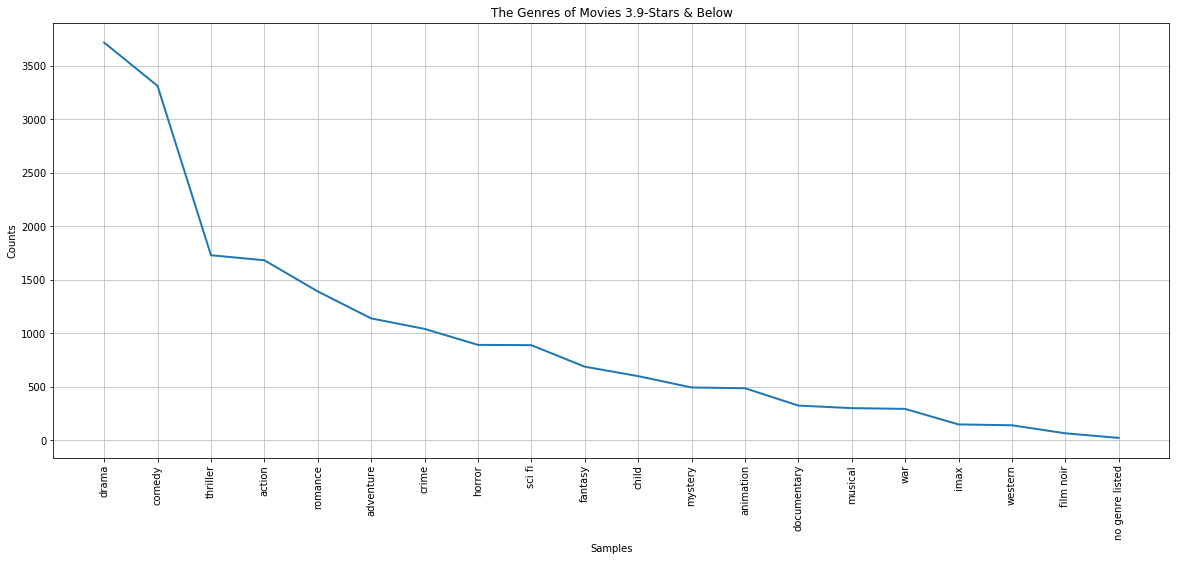

In [63]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(bad_reviews)

# Default size of graph is 6.4" x 4.8"
plt.figure(figsize=(20,8))

# Print the genres of movies that are 3.9-Stars & below
print(fdist.most_common(10))

fdist.plot(30,cumulative=False, title="The Genres of Movies 3.9-Stars & Below")

plt.show()

In [ ]:
# The genres of "good" movies:
# Drama, Comedy, Romance, Thriller, Crime, Action, Adventure, Animation, Documentary, Fantasy
# Sci-Fi, War, Horror, Mystery, Child, Musical, Western, Film Noir, No Genre Listed, IMAX


# The genres of "bad" movies:
# Drama, Comendy, Thriller, Action, Romance, Adventure, Crime, Horror, Sci-Fi, Fantasy, Child, Mystery
# Animination, Documentary, Musicial, War, IMAX, Western, Film Noir, and No Genre Listed



# We saw that the same genres can be classified into both "good" and "bad" reviewed categories.
# This means that we could not just consider genres and four-star ratings and up variables in order
# to help us with creating a film that would get us into the Sundance Film Festival.
# We found in this dataset that most of the movies are under Drama genre at 4,361 movies. The less
# frequent genres are: Sci-Fi at 980 movies, Horror at 978 movies, Fantasy at 779 movies, Child at 664,
# Animation at 611 movies, Mystery at 573 movies, etc. (Big drop happens at #3 Thriller)



# This finding helped us see what other genres we can consider...?
# But it helped us see which genres were consideratably less frequent to Drama, Comedy and Romance

## What is the most frequent occurring genre?

[('drama', 4361), ('comedy', 3756), ('thriller', 1894), ('action', 1828), ('romance', 1596), ('adventure', 1263), ('crime', 1199), ('sci fi', 980), ('horror', 978), ('fantasy', 779), ('child', 664), ('animation', 611), ('mystery', 573), ('documentary', 440), ('war', 382), ('musical', 334), ('western', 167), ('imax', 158), ('film noir', 87), ('no genre listed', 34)]


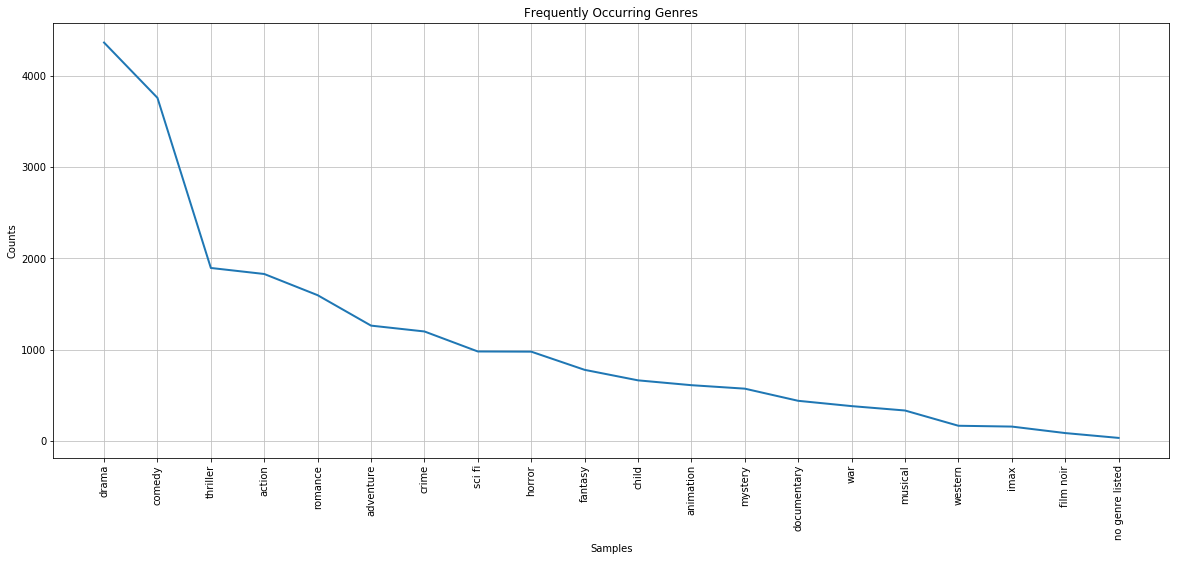

In [64]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(good_reviews + bad_reviews)

# Default size of graph is 6.4" x 4.8"
plt.figure(figsize=(20,8))

# Print the genres of movies that are 3.9-Stars & below
print(fdist.most_common(20))

fdist.plot(30,cumulative=False, title="Frequently Occurring Genres")


## Top 5 movie titles that are 4-stars & up

In [65]:
# Finding out how many ratings there are in this dataset. Created a variable number_of_ratings = number_of_ratings + 1
# in one of the top chunks.

print(number_of_ratings)

100836


In [66]:
import numpy as np
import operator

# Taking every movie and normalizing the ratings

# Made a new dictionary
new_dictionary = {}

for k, v in moviedata.items():
    # If there is a movie without a rating, then ignore that movie
    if len(v["rating"]) == 0:
        continue
    # Changed from string to a list of strings to a list of floats 
    else:    
        vals = v["rating"].split("|")    
        vals = list(map(lambda x: float(x), vals))
        
    # Calculated the average rating of each movie, row by row        
    vals_avg = np.mean(vals)
    # print(vals_avg)
    
    # Normalize by doing a len on a list
    normalize = vals_avg * (float(len(vals)) / float(number_of_ratings))
    # print(normalize)
    moviedata[k]["normalize"] = normalize # We added normalize to every movie
    
    new_dictionary[v["title"]] = normalize
    
# Sort by normalized ratings in descending order aka high to low    
sorted_x = sorted(new_dictionary.items(), key=operator.itemgetter(1), reverse=True)
# print(sorted_x)

# Showing the first 5 movies
for x in sorted_x[:5]:
    print(x[0])

Shawshank Redemption, The
Forrest Gump
Pulp Fiction
Matrix, The
Silence of the Lambs, The


## Top 5 movie titles that are 0.5 to 1-star rating

In [67]:
# Showing the bottom 5 movies from Worst rated movies to better. They could be 0.5 star rated or 1-star
for x in list(reversed(sorted_x))[:5]:
    print(x[0])

Fullmetal Alchemist 2018
The Emoji Movie
The Gracefield Incident
Bad Santa 2
Satanic
